# Loan Default Prediction

### 1. Introduction to the Dataset

In this project you will be working with a dataset made available through [Lending Club](https://www.lendingclub.com/). The original data is made available through [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data). However, we will be working with only a sample of their original dataset. 

Lending Club is a peer to peer lending company, where individuals can take personal loans based on their credit worthiness. The loan issue and approval processes are typically not as stringent as a bank and is usually **unsecured**. Hence, it is very important for Lending Club, as a platform to know ahead of time which loans will default and which loans will be successfully repaid. 

### 2. Dataset and [Data Dictionary](https://github.com/ssomanch/ITAO40230_Spring_2023/blob/main/LCDataDictionary.csv)

The original data included information for the years starting from 2007. However, to avoid the adverse effects due to the recession, we will only be working with a sample of data concentrating between the years 2009 to 2011. 

The Data Dictionary for the original data is available on [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data/data). I have also created a copy for the data dictionary [here on Github](https://github.com/ssomanch/ITAO30210_Fall_2019/blob/master/LCDataDictionary.csv). Note, that we will be using only subset of columns in our dataset. So, don't be surprised if you find some columns that are available in the data dictionary but not in our dataset. 

### 3. Project Details

Lending Club as a platform would like to give its customers (who are lending) an early indicator about how likely a loan requested by a peer customer will be repaid. This will increase more transactions on their platform leading to more loan transactions and hence more profit. 

#### 3.1 Main Goal

The main goal of the project is to use the information that is available before a loan is being issued to provide a method to **predict if a loan requested will be defaulted or not**. In the dataset, the `default_ind` gives an indicator if the loan is defaulted. If it is 1, the loan is defaulted and if it is 0, the loan has been successfully paid off. Hence, the main goal is to **learn from the data a classifier that can be used in Lending Club platform to help their lending customers make a decision to issue a loan**. 

#### 3.2 Suggested Steps: 

The following are high level steps involved in the project. **Do not forget to provide a justification for any choices you made** in any of the following steps. 

1. **Clean up the data**: The original dataset was large and messy. I have cleaned up the data for you, however, you have to complete the cleanup. The most important things to do are:
    * Identify which of the columns are of no use in predicting the default. For example, do you think the 'id' or 'title' will be a useful for predicting the default? Think carefully about each column in the dataset and remove all the columns that are not important. 
    * Are there any missing values in the data? If so, choose an appropriate method to fill these missing values. 
    * Find the columns (other than 'default_ind') that are categorical data type and use **`get_dummies`** method to convert them as indicators, so that they can be easily fed into a classifier. 
    * Finally, separate the input characteristics (X) and the outcome variable(Y). Note in this case the outcome variable of interest is `'default_ind'`. 

2. **Before analysis idenfication**: Once you have identified your input characteristics (X) that can be used to predict the loan default, provide an **ordered list** of these input characteristics (X) that you think will be most important in predicting the loan default. For this step, you do not need to do any data analysis, but provide qualitative reasons for choosing the order. 

2. **Split the Data**: Split the data randomly into the train and the test data. Use the training data to learn the classifier and use the test data to verify the accuracy of your learned classifier. 

3. **Learn the classifiers**: Learn the classifiers (Logistic Regression Classifier and Decision Tree Classifier) from the training data. 
    * Make sure you use a **cross validation** technique to learn the parameters of the classifier. 

4. **Testing the performance of the classifiers**: One of the ways to know if the classifier has learned the loan default prediction is to verify the performance of the classifiers on the test data. Present the accuracy of the classifier as well as the confusion matrix. 

5. **Understanding the classifiers**: One of the most basic things to open the learned classifier black box is to know which input characteristics were important for predicting the loan default. Use the existing functions (plot_feature_importance_coeff, plot_feature_importance) to plot the feature importance. Remember, `plot_feature_importance_coeff` is typically used for logistic regression classifier, and `plot_feature_importance` is used for decision tree classifier. 
    * **Discuss** how (dis)similar the order of the input characteristics is to the order you have chosen in step 2.  

5. **Report on managerial implications:** The **most important** of the analysis is to provide managerial implications from the analysis. At the end of the analysis, write down a short summary explaining the important takeaways from your analysis. 

### 4. Submission Expectations and Requirements

1. **Jupyter notebook** with your entire Python code and data analysis that you have done. It should *only* contain the analysis (Python code) that is used to make arguments in your project report. Points are allocated for neatness of Jupyter Notebooks. Also, you have to make sure the analysis is reproducible, that is, the grader should be able run your notebook to reproduce your results. 

2. You need to just submit one Jupyter notebook that includes both your analysis (Python code) and the report on managerial implications. Use headings in Markdown to clearly distinguish between your report and Python code. 


# <font color = 'blue'><u>Part 1: Cleaning Data</u></font>
## <font color = 'green'> Preparation</font>

### Importing for Data Manipulation, Cleaning, Visualization, and Machine Learning

In [74]:
import numpy as np
import pandas as pd

import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import seaborn as sns
sns.set(color_codes=True)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### <font color = 'green'> Loading the Data</font>

In [75]:
loan_data = pd.read_csv('./data/Lending_Club_sample_data.csv', encoding='latin-1')

In [76]:
#Check the data types of all columns in 'loan_data'
loan_data.dtypes

id                        int64
member_id               float64
funded_amnt             float64
term                     object
int_rate                float64
sub_grade                 int64
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
pymnt_plan               object
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs             float64
earliest_cr_line          int64
fico_range_low          float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_fico_range_high    float64
last_fico_range_low     float64
pub_rec_bankruptcies    float64
default_ind               int64
dtype: object

In [77]:
#set display to show all columns in the dataframe
pd.set_option('display.max_columns', None)

# show first three rows of the loan_data dataframe
loan_data.head(3)

,id,member_id,funded_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,default_ind
0,1077501,1296599.0,5000.0,36 months,10.65,7,NaN,10+ years,RENT,24000.0,Verified,n,credit_card,Computer,AZ,27.65,0.0,32,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,740.0,0.0,0
1,1077430,1314167.0,2500.0,60 months,15.27,14,Ryder,< 1 year,RENT,30000.0,Source Verified,n,car,bike,GA,1.00,0.0,18,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,1
2,1077175,1313524.0,2400.0,36 months,15.96,15,NaN,10+ years,RENT,12252.0,Not Verified,n,small_business,real estate business,IL,8.72,0.0,16,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,715.0,0.0,0


## <font color = 'green'>Data Cleaning</font>
The following steps were taken to clean the data:
- Create column for the average fico value which will act as a midpoint between the `fico_range_low` and `fico_range_high`. Having a midpoint (average) column will allow only one column to be used instead of the two high and low columns. 
- Create a midpoint (average) column for `last_fico_range_low` and `last_fico_range_high`. Also allows for only one column to be used to represent the same information rather than having two columns.
- Deleting 'months' from the `term` column to make term a numeric value rather than character. 
- Create a function to clean the `emp_length` column and make it all numeric values with no text. The following numbers were used with their associated meanings in the `get_employmentlen()` function: 
    - 1: one or fewer years
    - 2: two years
    - 3: three years
    - 4: four years
    - 5: five years
    - 6: six years
    - 7: seven yeras
    - 8: eight years
    - 9: nine years
    - 10: ten or more years
- Clean the `purpose` categorical column by creating a function. The top three categories will be used and all other values will be assigned "other".
- Clean the `home_ownership` categorical column by creating a function. The top two categories (RENT and MORTGAGE) will be used and all other values will be assigned "other".

In [78]:
#create an average of the two values in fico_range_low and fico_range_high titled fico_range_avg
loan_data['fico_range_avg'] = (loan_data['fico_range_high'] + loan_data['fico_range_low'])/2

In [79]:
#create an average of the two values in last_fico_range_low and last_fico_range_high titled last_fico_range_avg
loan_data['last_fico_range_avg'] = (loan_data['last_fico_range_high'] + loan_data['last_fico_range_low'])/2

In [80]:
#look at the first five rows of just the fico related columns
loan_data[['fico_range_low', 'fico_range_high', 'fico_range_avg',
           'last_fico_range_low', 'last_fico_range_high', 'last_fico_range_avg']].head()

,fico_range_low,fico_range_high,fico_range_avg,last_fico_range_low,last_fico_range_high,last_fico_range_avg
0,735.0,739.0,737.0,740.0,744.0,742.0
1,740.0,744.0,742.0,0.0,499.0,249.5
2,735.0,739.0,737.0,715.0,719.0,717.0
3,690.0,694.0,692.0,600.0,604.0,602.0
4,695.0,699.0,697.0,690.0,694.0,692.0


In [81]:
# delete 'months' from the term column 
loan_data['term'] = loan_data['term'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [82]:
# use sample of three rows to confirm 'months' were deleted from term column
loan_data.sample(3)

,id,member_id,funded_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,default_ind,fico_range_avg,last_fico_range_avg
38908,433878,517193.0,11200.0,36,14.96,17,Norton Hospital,3 years,OTHER,47000.0,Not Verified,n,debt_consolidation,Consolidation Loan,KY,16.09,0.0,18,685.0,689.0,6.0,20.0,0.0,11005.0,37.2,43.0,624.0,620.0,0.0,1,687.0,622.0
20372,657410,840756.0,4000.0,60,13.06,12,NaN,4 years,RENT,15600.0,Not Verified,n,debt_consolidation,Debt Consolidation,CA,18.85,0.0,13,725.0,729.0,0.0,3.0,0.0,2735.0,94.3,6.0,694.0,690.0,0.0,0,727.0,692.0
15293,752188,951744.0,4000.0,60,12.99,11,OCM Lee Hecht Harrison,6 years,MORTGAGE,34000.0,Not Verified,n,credit_card,Credit Card Payoff,NV,20.86,0.0,16,690.0,694.0,0.0,6.0,1.0,4071.0,59.0,8.0,639.0,635.0,1.0,0,692.0,637.0


In [83]:
# make a function to convert emp_length to a numeric 0-10
def get_employmentlen(length):
    if length == '< 1 year':
        return 0
    elif length == '1 year':
        return 1
    elif length == '2 years':
        return 2
    elif length == '3 years':
        return 3
    elif length == '4 years':
        return 4
    elif length == '5 years':
        return 5
    elif length == '6 years':
        return 6
    elif length == '7 years':
        return 7
    elif length == '8 years':
        return 8
    elif length == '9 years':
        return 9
    elif length == '10+ years':
        return 10

In [84]:
#apply the employment length function to the original 'emp_length' column
loan_data['emp_length'] = loan_data['emp_length'].apply(get_employmentlen)

In [85]:
#check the number of values in the categorical 'purpose' column
loan_data['purpose'].value_counts()

debt_consolidation    18593
credit_card            4991
other                  3973
home_improvement       3023
major_purchase         2210
small_business         1809
car                    1548
wedding                 938
medical                 693
moving                  583
house                   392
vacation                382
educational             301
renewable_energy        103
Name: purpose, dtype: int64

In [86]:
#create a function to have only top three purposes AND other category
def clean_purpose(purp):
    if purp == "debt_consolidation":
        return 'debt_consolidation'
    elif purp == "credit_card": 
        return 'credit_card'
    elif purp == "home_improvement":
        return 'home_improvement'
    else:
        return 'other'

In [87]:
#apply clean_purpose function to purpose category
loan_data['purpose'] = loan_data['purpose'].apply(clean_purpose)

In [88]:
#confirm upadted values of purpose column
loan_data['purpose'].value_counts()

debt_consolidation    18593
other                 12932
credit_card            4991
home_improvement       3023
Name: purpose, dtype: int64

In [89]:
#check value counts of home_ownership column
loan_data['home_ownership'].value_counts()

RENT        18577
MORTGAGE    17822
OWN          3051
OTHER          89
Name: home_ownership, dtype: int64

In [90]:
#create function to clean the home_ownership column with RENT, MORTGAGE and OTHER values
def clean_home_owner(home):
    if home == "RENT":
        return 'RENT'
    elif home == "MORTGAGE": 
        return 'MORTGAGE'
    else:
        return 'OTHER'

In [91]:
#apply clean_home_owner function to home_ownership column
loan_data['home_ownership'] = loan_data['home_ownership'].apply(clean_home_owner)

In [92]:
#confirm only three categories within home_ownership column
loan_data['home_ownership'].value_counts()

RENT        18577
MORTGAGE    17822
OTHER        3140
Name: home_ownership, dtype: int64

In [93]:
#confirm data types
loan_data.dtypes

id                        int64
member_id               float64
funded_amnt             float64
term                      int64
int_rate                float64
sub_grade                 int64
emp_title                object
emp_length              float64
home_ownership           object
annual_inc              float64
verification_status      object
pymnt_plan               object
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs             float64
earliest_cr_line          int64
fico_range_low          float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_fico_range_high    float64
last_fico_range_low     float64
pub_rec_bankruptcies    float64
default_ind               int64
fico_range_avg          float64
last_fic

## <font color='green'> <u>Justification for Dropping Initial Columns</u></font>
##### Dropped Columns: `id`, `member_id`,`addr_state`, `title`, `earliest_cr_line`, `emp_title` ,  `pymnt_plan`
- <b> `id` </b>: The `id` is used to uniquely identify each loan, and this is not relevant to the analysis of creating a model to predict whether a requested loan will be defaulted. 
- <b> `member_id`</b>: The goal is to find commonalities that can be applied to all Lending Club users. `id` would punish existing customers who defaulted, and it would not be beneficial in the model for customers applying for first time.
- <b> `addr_state` </b>: The `addr_state` column was dropped as including the column may be biased against states where there are many lending club members who default. Dropping the state column will prevent bias against people from specific states. 
- <b> `title` </b>: out of almost 40K rows, there are over 19K unique `title` values indiciating that the title is unlikely to be an important predictor given most of titles are different. 
- <b> `earliest_cr_line` </b>:  `earliest_cr_line` is dropped because it is simply the month that the earliest credit line was open.
- <b> `emp_title` </b>: Out of almost 40K rows, there are over 28K unique employee titles thus suggesting there is not a significant pattern or relationship with `emp_title` and justifying removing the column. 
- <b> `pymnt_plan` </b>: payment plan is dropped because all but one value within the dataset is a 'n' value therefore it can be dropped. 

In [94]:
# drop catergorical and irrelvant columns
loan_data.drop(['id', 'member_id','addr_state', 'title', 'earliest_cr_line', 'emp_title', 'pymnt_plan' ], axis=1, inplace=True)
loan_data.head()

,funded_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,default_ind,fico_range_avg,last_fico_range_avg
0,5000.0,36,10.65,7,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,740.0,0.0,0,737.0,742.0
1,2500.0,60,15.27,14,0.0,RENT,30000.0,Source Verified,other,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,1,742.0,249.5
2,2400.0,36,15.96,15,10.0,RENT,12252.0,Not Verified,other,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,715.0,0.0,0,737.0,717.0
3,10000.0,36,13.49,11,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,600.0,0.0,0,692.0,602.0
4,3000.0,60,12.69,10,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,694.0,690.0,0.0,0,697.0,692.0


In [95]:
#drop the fico lows and highs because the average column that was created encompasses these values already
loan_data.drop(['fico_range_low', 'fico_range_high','last_fico_range_low', 'last_fico_range_high'], axis=1, inplace=True)

In [96]:
loan_data.head()

,funded_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,default_ind,fico_range_avg,last_fico_range_avg
0,5000.0,36,10.65,7,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0,737.0,742.0
1,2500.0,60,15.27,14,0.0,RENT,30000.0,Source Verified,other,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,1,742.0,249.5
2,2400.0,36,15.96,15,10.0,RENT,12252.0,Not Verified,other,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0,737.0,717.0
3,10000.0,36,13.49,11,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0,692.0,602.0
4,3000.0,60,12.69,10,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0,697.0,692.0


## <font color='green'> <u>Identifying Additional Columns to Drop</u></font>

In [97]:
#retrieve only numeric columns to allow for correlation analysis 
numeric_cols = loan_data.drop(['home_ownership', 'verification_status', 'purpose'], axis = 1)
numeric_cols.head(2)

,funded_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,default_ind,fico_range_avg,last_fico_range_avg
0,5000.0,36,10.65,7,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0,737.0,742.0
1,2500.0,60,15.27,14,0.0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,1,742.0,249.5


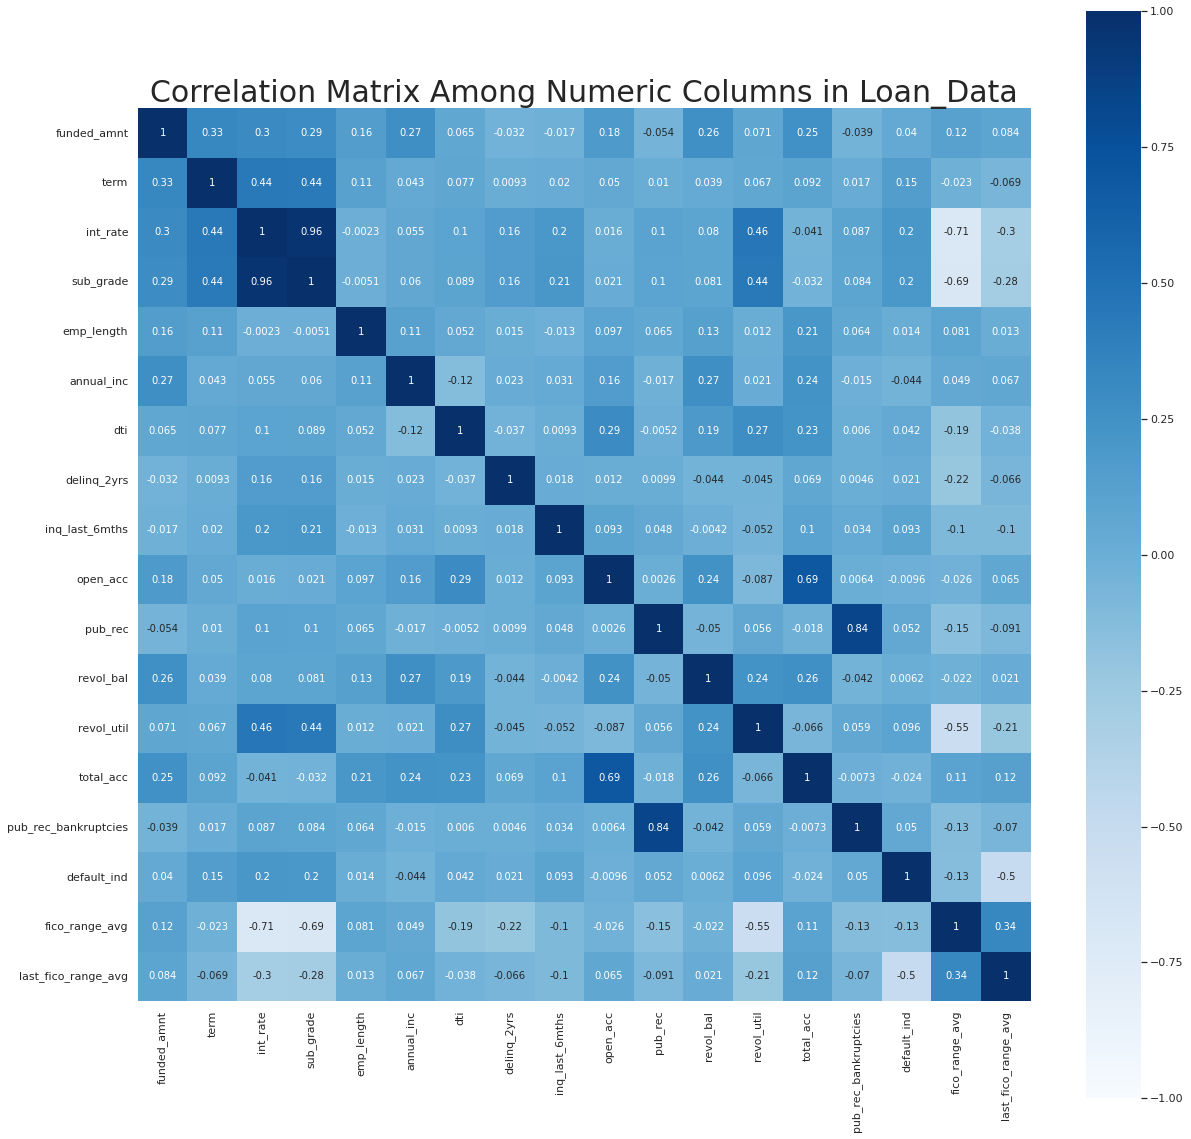

In [98]:
#create a correlation matrix with all numeric columns
corr_matrix=numeric_cols.corr()

figure, axes = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, square=True, cmap="Blues")
axes.set_title("Correlation Matrix Among Numeric Columns in Loan_Data", size = 30);

### <font color='green'> Highly-Correlated Columns </font>
- <b> `int_rate`</b> & <b>`sub_grade` </b> : correlation = 0.96
- <b> `pub_rec` </b> & <b>`pub_rec_bankruptcies`</b> : correlation = 0.84
- <b> `open_acc` </b> & <b>`total_acc`</b>: correlation = 0.69

##### Due to the high correlation among these variables (all above .65), one of the variables should be dropped. 

**Dropped** Variables:
- int_rate 
- pub_rec
- open_acc

**Kept** Variables:
- sub_grade
- pub_rec_bankruptcies
- total_acc

**Reasoning:** we decided to drop int_rate and keep sub_grade, since sub_grade grade the loans so more than one factor is taken into consideration, while int_rate only analyze the loan from one perspective, thus we believe sub_grade provides better insight into the model. Pub_rec_bankrupticies was preferred because we are trying to predict loan default, therefore we want to focus on the final aspect of the loan. Finally, total_acc was chosen since it provides the current total number of credit lines and we believe having more recent information is more important to the model

In [99]:
# drop highly-correlated columns
loan_data.drop(['int_rate', 'pub_rec', 'open_acc'], axis=1, inplace = True)

## <font color='green'> <u>Justification for Dropping NA Values</u></font>
There are 1158 rows with NA values, which is less than 3% of all values in the dataset.  Dropping these rows will not make a significant difference. Additionally, 1112 of the NA values are in the `emp_length` column. Although filling NA values with a median or mean value is another option to deal with null values, it is not appropriate in this case because of the `emp_length` values. For example, 1 stands for one year or less and 10 stands for 10 or more years. Therefore, an accurate mean cannot be calculated on the `emp_length` column. For these reasons, it is justified to drop the rows containing NA values. 

In [100]:
#count the number of rows with null values
loan_data.isna().any(axis=1).sum()

1158

In [101]:
loan_data = loan_data.dropna()

In [102]:
#confirm only 1158 rows were dropped
len(loan_data) 

38381

In [103]:
loan_data.head(2)

,funded_amnt,term,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,default_ind,fico_range_avg,last_fico_range_avg
0,5000.0,36,7,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,13648.0,83.7,9.0,0.0,0,737.0,742.0
1,2500.0,60,14,0.0,RENT,30000.0,Source Verified,other,1.00,0.0,5.0,1687.0,9.4,4.0,0.0,1,742.0,249.5


## <font color='green'> <u>Create Dummy Variables</u></font>

Dummy columns were created for the categorical values. After cleaning, only the **`home_ownership`, `verification_status`, **and** `purpose`** columns required dummies. Once the dummies were created, the column representing the most common value was dropped and used as the baseline. For example, 'RENT' was the most popular value in the `home_ownership` column, so the `home_ownership_RENT` column was dropped and used as the baseline for `home_ownership`. 

In [104]:
loan_data['home_ownership'].value_counts()
#want to have "RENT" as baseline

RENT        18122
MORTGAGE    17345
OTHER        2914
Name: home_ownership, dtype: int64

In [105]:
loan_data['verification_status'].value_counts()
#want to have "Not Verified" as baseline

Not Verified       15643
Verified           12667
Source Verified    10071
Name: verification_status, dtype: int64

In [106]:
loan_data['purpose'].value_counts()
#want to have "debt_consolidation" as baseline

debt_consolidation    18170
other                 12436
credit_card            4855
home_improvement       2920
Name: purpose, dtype: int64

In [107]:
#Get dummies
loan_data_with_dummies = pd.get_dummies(loan_data)
loan_data_with_dummies.dtypes

funded_amnt                            float64
term                                     int64
sub_grade                                int64
emp_length                             float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
pub_rec_bankruptcies                   float64
default_ind                              int64
fico_range_avg                         float64
last_fico_range_avg                    float64
home_ownership_MORTGAGE                  uint8
home_ownership_OTHER                     uint8
home_ownership_RENT                      uint8
verification_status_Not Verified         uint8
verification_status_Source Verified      uint8
verification_status_Verified             uint8
purpose_credi

In [108]:
#drop the most popular column as the baseline
loan_data_with_dummies.drop(['home_ownership_RENT', 'verification_status_Not Verified', 'purpose_debt_consolidation'],
                            axis=1, inplace=True)

In [109]:
#confirm that home_ownership_RENT', 'verification_status_Not Verified', 'purpose_debt_consolidation' were dropped 
loan_data_with_dummies.head(2)

,funded_amnt,term,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,default_ind,fico_range_avg,last_fico_range_avg,home_ownership_MORTGAGE,home_ownership_OTHER,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_home_improvement,purpose_other
0,5000.0,36,7,10.0,24000.0,27.65,0.0,1.0,13648.0,83.7,9.0,0.0,0,737.0,742.0,0,0,0,1,1,0,0
1,2500.0,60,14,0.0,30000.0,1.00,0.0,5.0,1687.0,9.4,4.0,0.0,1,742.0,249.5,0,0,1,0,0,0,1


## <font color='green'> <u>Dropping the Outcome Column</u></font>
##### `default_ind` is dropped as it is the outcome column being predicted in the model

In [110]:
# drop outcome column 
loan_data_X = loan_data_with_dummies.drop('default_ind', axis = 1)
loan_data_Y = loan_data_with_dummies['default_ind']

# Part 2: Before Analysis Identification

The following list is the hypothesized rank of variables due to importance. Justification is provided for the positions of each variable. The dummy variables are treated collectively rather than separately in the importance variable list. 

#### <u>Hypothesized Ordered List of Input Characteristics</u>
1. <b> `delinq_2yrs`</b>: The number of occurrences of delinquency in the past two years where the payment is 30+ days past due will indicate irresponsibility. This variable can help predict whether the individual is also likely to default in the future. 
2. <b> `last_fico_range_avg` </b>: The most recent fico range average value will be an indicator of an individual’s credit score which will be extremely important in determining whether an individual is likely to default. 
3. <b> `sub_grade` </b>: An individual is classified based on their credit score and graded on the likelihood that they repay their loan principal and interest. This variable has already identified how likely an individual is to repay, assessing the riskiness for a loan. 
4. <b> `pub_rec_bankruptcies`</b>: Public bankruptcies are likely to be a strong predictor of whether a loan defaults as the 
5. <b> `dti` </b>: The ratio of an individual's total monthly debt repayment in comparison to the individual’s monthly income, if this ratio is closer to or greater than one, they will be more likely to default on the loan.
6. <b> `inq_last_6mths` </b>: Individuals with many inquiries in the last six months are likely to be very desperate for a loan which could be a strong predictor of default.  
7. <b> `annual_inc` </b>: An individual with a high annual income is likely more responsible and less likely to default than an individual with a lower annual income. Therefore it may be a valuable predictor of whether an individual will default. 
8. <b> `purpose` dummy columns</b>: The reason to why the loan was required might reflect the buying behaviour of the person, for example, if the loan is to pay more debt it shows poor financial managemnt, thus it might provide valuable insight.
9. <b> `total_acc` </b>: Given that the number of credit lines an individual has can harm their credit score, the total amount of lines an individual has may not be a key predictor seeing that we already know their credit score. 
10. <b> `funded_amnt` </b>: The funded amount would be relatively important in predicting defaults as those with a high funded value may be less likely to default than those who have committed less money. 
11. <b> `revol_util` </b>: Credit utilization is relatively important given it is the total debt divided by total credit. However, revol_util is near the bottom of the list because these metrics are reflected in other metrics above such as the last_fico_range_avg.
12. <b> `revol_bal` </b>: The main concern with revolving balance is that it accrues interest, but if Lending Club already has an idea if an individual will repay the loan principal and its interest, then this variable is not an important factor. 
13. <b> `home_ownership` dummy columns </b>: Given there are only three possible options for the home_ownership variable it appears to be somewhat important, but it is not as significant as other predictors so home_ownership is toward the bottom of the list. 
14. <b> `fico_range_avg` </b>: The last_fico_range_avg is likely to be much more important than the fico_range_avg given it is the most recent value, therefore fico_range_average is toward the bottom of the list of hypothesized predictors.  
15. <b> `verification_status` dummy columns </b>: The verification status does not appear to be that important because there are verifications from multiple sources, so it may not be reliable to trust verifications from sources other than Lending Club. 
16. <b> `emp_length` </b>: An individual’s length of employment is also towards the bottom of the list as it is unlikely there is a significant difference between any two values such as four years of employment versus three or five years. 
17. <b> `term`</b>: The length of the term should not be a very important factor given it can only be two values, 36 or 60, therefore it is at the bottom of the hypothesized predictors. 

# Part 3: Split the Data

In [111]:
loan_train_X, loan_test_X, loan_train_Y, loan_test_Y = train_test_split(loan_data_X, loan_data_Y, random_state = 533, 
                                                                        train_size = 0.7)

# Part 4: Learn the Classifiers

##### Contents:
- Logistic Regression Classifier
- Decision Tree Classifier
- Cross Validation for parameters

In [112]:
loan_data['default_ind'].value_counts()

#data is clearly unbalanced thus justifying class_weight = 'balanced' in the logistic regression and decision tree models

0    32876
1     5505
Name: default_ind, dtype: int64

In [113]:
#Create Logistic Regression Classifier
log_model=LogisticRegression(solver='liblinear',random_state=533,class_weight='balanced')
    
log_params= {'penalty': ['l1','l2'],
        'C': [0.01,0.1,1,10,100]}
    
grid_search_log= GridSearchCV(log_model,param_grid=log_params,cv=10,n_jobs=3)
    
grid_search_log.fit(loan_train_X,loan_train_Y)
    
best_log= grid_search_log.best_estimator_
    
log_predict_y=best_log.predict(loan_test_X)

In [114]:
#Create Decision Tree Classifiers
dec_model = DecisionTree(class_weight='balanced', random_state=533)

dec_params = {'max_depth':[2,3,4,5,6,7,8],
          'max_features':['auto','log2',None]}



grid_search_dec_tree = GridSearchCV(dec_model, param_grid=dec_params, cv=10, n_jobs = 3)

grid_search_dec_tree.fit(loan_train_X, loan_train_Y)

best_dec= grid_search_dec_tree.best_estimator_

dec_predict_y= best_dec.predict(loan_test_X)

# Part 5: Testing the Performance of Classifiers

##### Contents:
- Accuracy 
- Confusion Matrix

The accuracy of the logistic regression model is 82.97003907946157


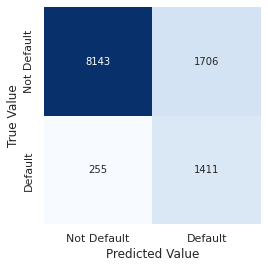

In [115]:
#LOGISTIC REGRESSION MODEL
print("The accuracy of the logistic regression model is", metrics.accuracy_score(loan_test_Y,log_predict_y)*100)

conf_mat= metrics.confusion_matrix(loan_test_Y, log_predict_y)

sns.heatmap(conf_mat, fmt='g',square=True, annot=True, cbar = False, xticklabels = ['Not Default','Default'], 
                                                            yticklabels = ['Not Default','Default'], cmap= 'Blues')
plt.xlabel("Predicted Value")
plt.ylabel("True Value");

The accuracy of the decision tree model is 79.8697351280938


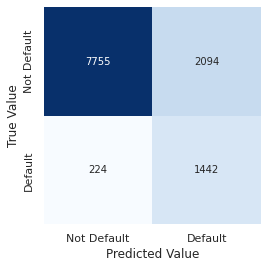

In [116]:
#DECISION TREE MODEL
print("The accuracy of the decision tree model is", metrics.accuracy_score(loan_test_Y,dec_predict_y)*100)

conf_mat= metrics.confusion_matrix(loan_test_Y, dec_predict_y)

sns.heatmap(conf_mat, fmt='g',square=True, annot=True, cbar = False, xticklabels = ['Not Default','Default'], 
                                                            yticklabels = ['Not Default','Default'], cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("True Value");

# Part 6: Understanding the Classifiers

##### Contents
- plotting coefficients and features
- discuss how similar/different from part 2 (predicted importance)

#### Plotting functions used in Step 6: Call this function with the appropriate parameters in Step 6. 

In [117]:
# Defining a function to plot coefficients as feature importance
# INPUT: Used for Logistic Regression Classifier
#        Feature Names
# OUTPUT: A plot of top most Coefficients
def plot_feature_importance_coeff(model, Xnames, cls_nm = None):

    imp_features = pd.DataFrame(np.column_stack((Xnames, model.coef_.ravel())), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    # Sort the features based on absolute value of importance
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])
    
    # Plot the feature importances 
    plt.figure(figsize=(10, 16))
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout() 
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

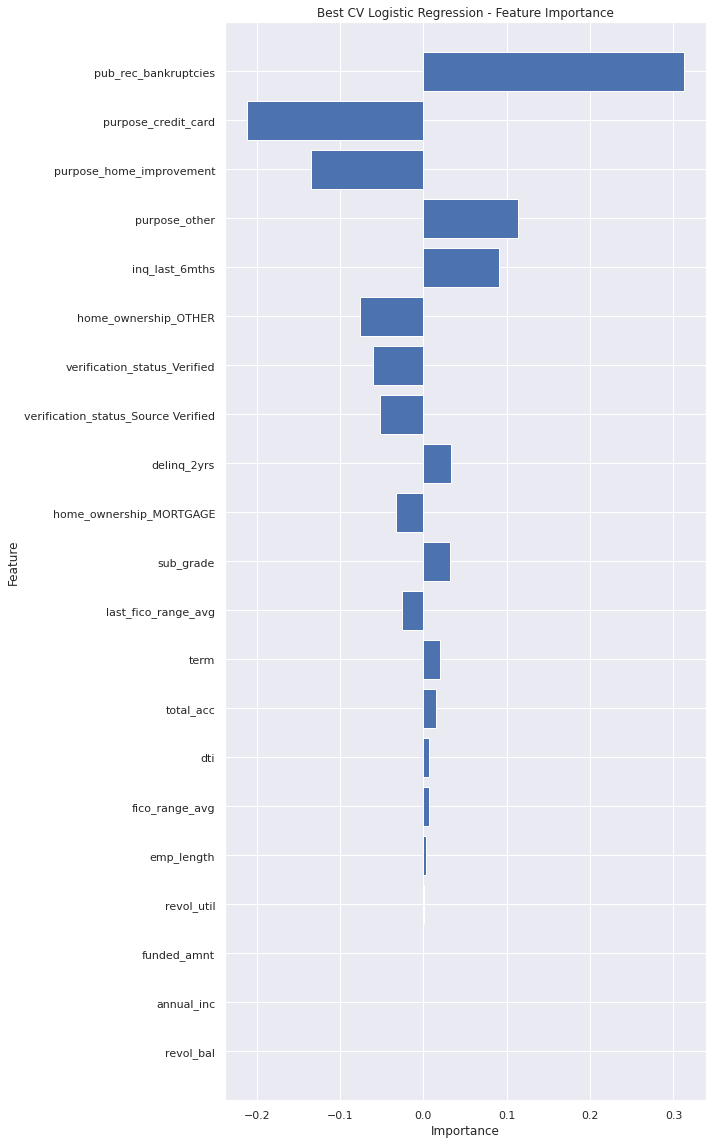

In [118]:
plot_feature_importance_coeff(best_log, loan_data_X.columns, cls_nm="Best CV Logistic Regression")

### Justification for Logistic Regression Features
When comparing the important features from the logistic regression model to the hypothesized order of features, there were some similarities but also some stark differences. First, the pub_rec_bankruptcies were the most important in the logistic regression model, and this variable was hypothesized to be fourth. Given there were twenty features this was a relatively close prediction. The second and third most important features of the logistic regression were the purpose_credit_card and the purpose_home_improvement. Both of these were predicted to be eighth in the hypothesized model as the hypothesized order predicted the dummy variables collectively.

Some of the largest differences between the logistic regression and the hypothesized features were for the annual_inc, dti, and last_fico_range_avg. The annual_inc was hypothesized to be 7th but the logistic regression had it as the 20th most important feature. This is likely because an individual’s annual income is reflected through other metrics that are more important features in the model. Another difference was that dti was hypothesized to be the fifth most important feature, but dti was the 15th most important feature in the logistic regression. Although there were some differences between the hypothesized features and the important features in the logistic regression model, there were also some similarities. Ultimately, the logistic regression model determined that pub_rec_bankruptcies, purpose_credit_card, purpose_home_improvement, purpose_other, and inq_last_6mnths were the most important features for predicting loan defaults. 


In [119]:
# Defining a function to plot feature importance for trees
# INPUT: Used for Tree based Classifier
#        Feature Names
# OUTPUT: A plot of top most features

def plot_feature_importance(model, Xnames, cls_nm = None):

    # Measuring important features
    imp_features = pd.DataFrame(np.column_stack((Xnames, model.feature_importances_)), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    # Sort the features based on absolute value of importance
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])
    
    # Plot the feature importances
    plt.figure(figsize=(10, 16))
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout() 
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

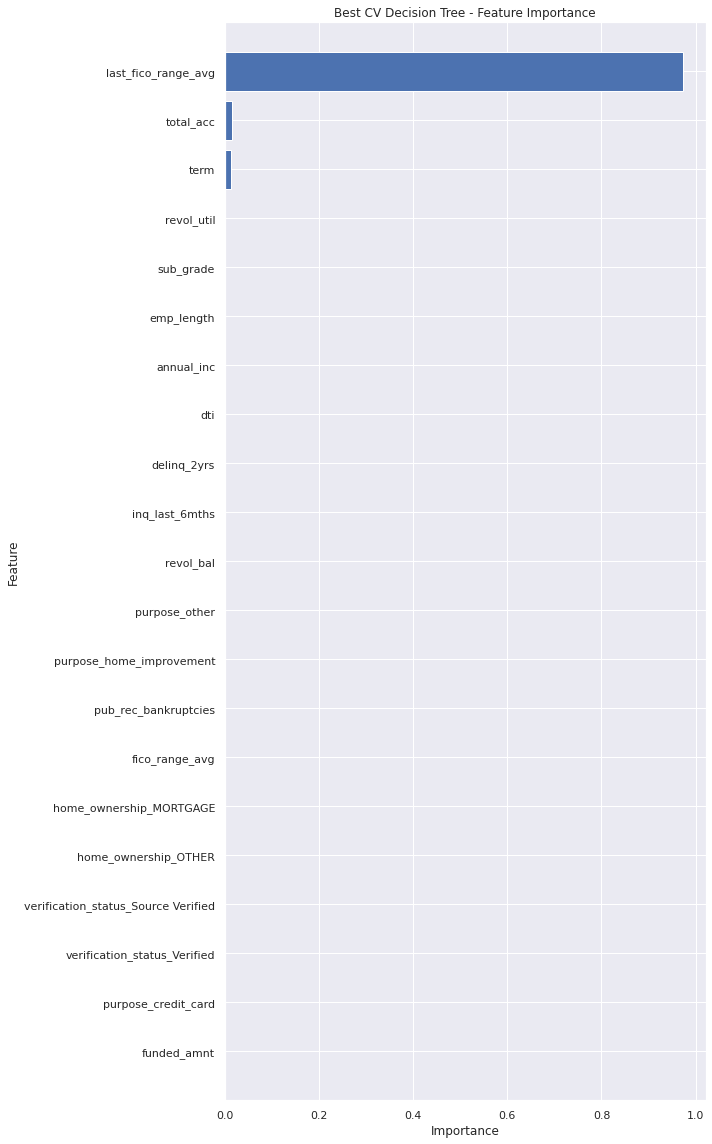

In [120]:
plot_feature_importance(best_dec, loan_data_X.columns, cls_nm="Best CV Decision Tree")

### Justification for Decision Tree Features
Looking at the decision tree feature importance, we were able to see that there were some inaccuracies in our hypothesized model. The three features that held importance in the decision tree were last_fico_range_avg, total_acc, and term. Our team predicted that last_fico_range_avg would hold a lot of weight, placing it as the second most important predictor, when in reality it was the top predictor. However, our team did not realize the importance of total_acc and term, placing them 9th and 17th, respectively. These variables turned out to be the second and third most accurate predictors. Following the top three variables, the rest of the variables displayed zero importance in predicting loan defaults.

# Part 7: Report on Managerial Implications
Lending Club management should select a model based on its priorities. However, this begins by comparing the two models and identifying the strengths and weaknesses of each model. In terms of accuracy, the logistic regression model had a higher accuracy value of 82.97% in comparison to the decision tree model which had an accuracy of 79.87%. When comparing the models however based on errors, there is a different story. The logistic regression has fewer false positives which is predicting someone will default when they do not actually default. However, the decision tree model has fewer false negatives, which is predicting someone will not default who actually defaults. 

Ultimately, Lending club management must first determine their priorities in order to choose which model they would prefer. If Lending Club wants to have the highest overall accuracy of a model, management may select the logistic regression. However, if management wants a model that minimizes the number of loans predicted not to default but actually end up defaulting, then the decision tree model would be best. 

The decision tree was more cautious, grouping more individuals to default, who did not actually default. Therefore, limiting the risk of those individuals defaulting. It prioritized an individual’s latest credit score, the total amount of credit lines on their account, and term length. Although it only had a lower accuracy score, it was able to accurately predict more individuals that defaulted on their loans, increasing the number of false positives in the model. 

On the other hand, the logistic regression model had more false negatives. These false negatives have a greater potential of hurting Lending Club. This means the logistic regression model would predict that an individual would not default on their loan, when in reality they end up defaulting. If the company uses this model, it would give out loans to individuals who will not end up repaying it. Even with the higher accuracy value, it could end up causing a higher amount of harm to the company. 

Lending Club management also has a key interest in identifying features that are important to determining whether an individual defaults on a loan. In the logistic regression model, public record bankruptcies and the purpose of the loan were critical features. On the other hand, the top three features in the decision tree model were the last FICO range average, the term of the loan, and the total number of credit lines the individual has. Although there are some differences between the models, the logistic regression and the decision tree identified key features for defaulting. Lending Tree must consider and closely monitor these features as they can help mitigate Lending Club’s risk by predicting whether an individual will default. 